In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# # Đọc dữ liệu từ tệp CSV
df = pd.read_csv("clean data//clean_data_train_clustered.csv")

# Chia dữ liệu thành các tập huấn luyện và kiểm tra
X = df.drop(columns=['Cluster'])  # Loại bỏ cột nhãn 'Cluster'
y = df['Cluster']  # Chỉ lấy cột nhãn 'Cluster'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=42)

# Khởi tạo và huấn luyện mô hình Naive Bayes
model1 = GaussianNB()
model1.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = model1.predict(X_test)

# Đánh giá hiệu suất của mô hình
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       389
           1       0.84      0.93      0.88        74
           2       0.74      0.93      0.82        15

    accuracy                           0.96       478
   macro avg       0.86      0.94      0.90       478
weighted avg       0.97      0.96      0.96       478



In [25]:
# Tính toán và in ra độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9623430962343096


### RandomForestClassifier

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


df = pd.read_csv("clean data//clean_data_train_clustered.csv")
# Chia dữ liệu thành các tập huấn luyện và kiểm tra
X = df.drop(columns=['Cluster'])  # Loại bỏ cột nhãn 'Cluster'
y = df['Cluster']  # Chỉ lấy cột nhãn 'Cluster'
# Chia dữ liệu thành các tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=42)


# Khởi tạo và huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       0.99      1.00      0.99        74
           2       1.00      1.00      1.00        15

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478



In [10]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dữ liệu từ file CSV
data = pd.read_csv('clean data//clean_data_train_clustered.csv')

# Xác định biến độc lập (features) và biến mục tiêu (target)
X = data.drop('Cluster', axis=1)  # features
y = data['Cluster']  # target

# Chuyển đổi các biến phân loại thành số
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.997907949790795


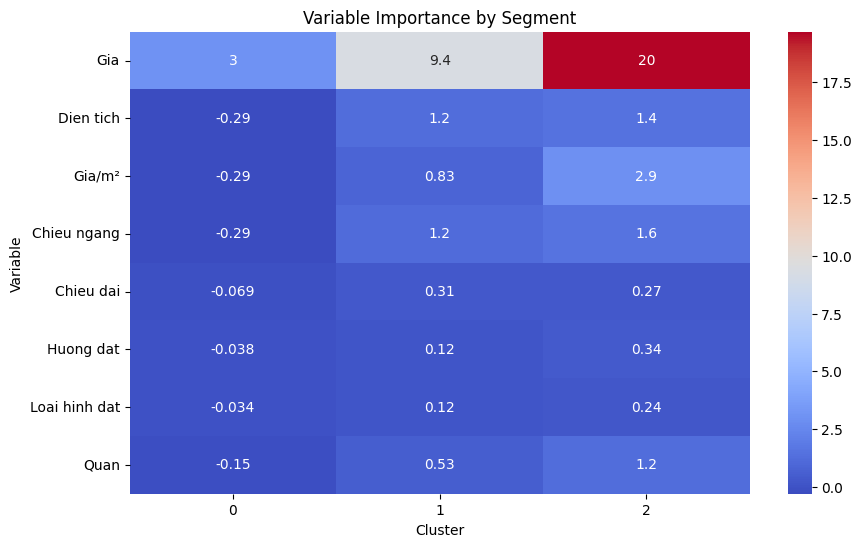

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu: 
# 1. Group data theo 'Cluster' và tính trung bình sự quan trọng của các biến
# 2. Chuyển dữ liệu từ dạng wide sang dạng long để vẽ biểu đồ

segment_importance = data.groupby('Cluster').mean().reset_index()
segment_importance = segment_importance.drop(columns=['Cluster'])  # Loại bỏ cột 'Cluster'
segment_importance = segment_importance.T  # Transpose DataFrame để có thể vẽ heatmap

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segment_importance, annot=True, cmap='coolwarm')
plt.title('Variable Importance by Segment')
plt.xlabel('Cluster')
plt.ylabel('Variable')
plt.show()


- biến **Gia** có mức độ quan trọng cao nhất đối với mỗi loại
- biến **loai hinh dat** có mức độ quan trọng thấp nhất đối với mỗi loại

<Figure size 1000x600 with 0 Axes>

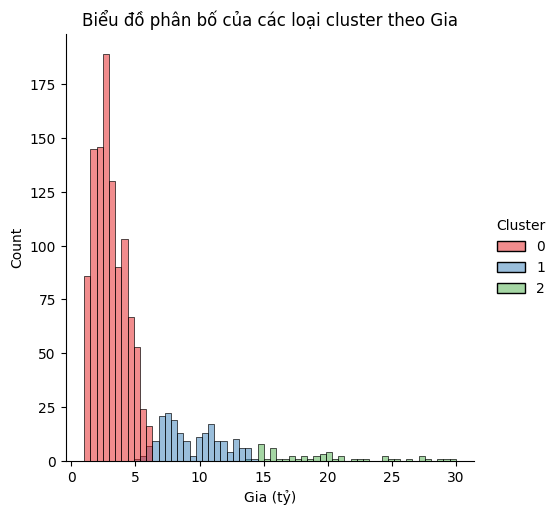

In [14]:
df = pd.DataFrame(data)

# Tạo một cột 'count' để đếm số lượng mỗi giá trị 'Gia' trong từng cluster
df['count'] = df.groupby(['Gia', 'Cluster'])['Gia'].transform('count')

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Gia',  hue='Cluster', palette='Set1')

plt.title('Biểu đồ phân bố của các loại cluster theo Gia')
plt.xlabel('Gia (tỷ)')
plt.ylabel('Count')
# plt.legend(title='Cluster')
plt.grid(False)
plt.show()

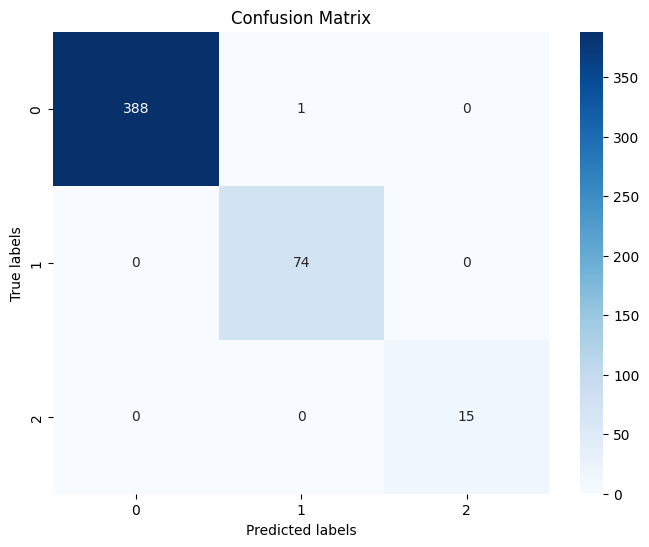

In [13]:
from sklearn.metrics import confusion_matrix

# Dự đoán cluster cho dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

- Mô hình dự đoán tốt, chỉ nhầm lẫn rất ít mẫu 

### Kiem tra mo hinh bang ky thuat cross-validation

In [2]:
from sklearn.model_selection import cross_val_score


# Thực hiện cross-validation với số fold là 10
cv_scores = cross_val_score(model, X, y, cv=5)

# In kết quả cross-validation scores
for i in cv_scores:
    print(i)

# In trung bình của các scores
print("Average Accuracy:", cv_scores.mean())


1.0
0.9961240310077519
0.9883720930232558
0.9961240310077519
0.9844961240310077
Average Accuracy: 0.9930232558139535


## Test Model

In [21]:
import pandas as pd
data= pd.read_csv("clean data/clean_data_test_clustered.csv")

X_t = data.drop('Cluster', axis=1)  # features
y_t = data['Cluster']  # target

y_pred = model.predict(X_t)

# Đánh giá độ chính xác của mô hình
accuracyt = accuracy_score(y_t, y_pred)
print("Accuracy:", accuracyt)


Accuracy: 0.9928400954653938


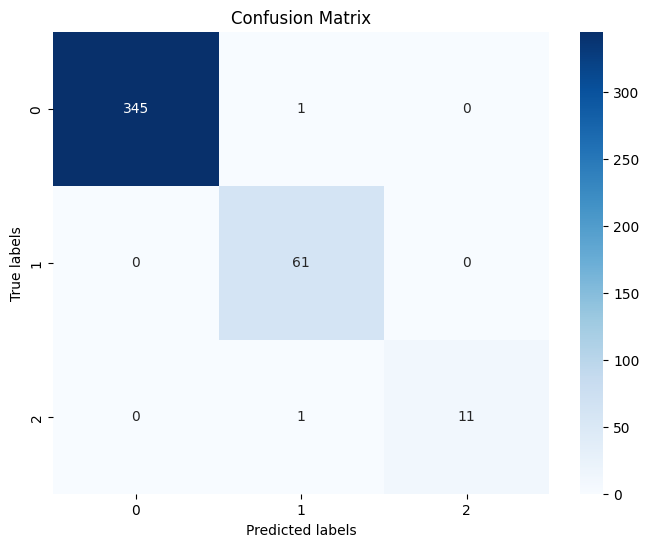

In [10]:
from sklearn.metrics import confusion_matrix

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_t, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()